# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Tuan Hoang

## What does a Simple Linear Regression Model do?
##### It predicts the value of a dependent variable by only using one independent variable

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* r-value measures the strength and direction of the linear relationship between two variables
* It ranges from -1 to 1
* An r-value that's close to 1 indicates a strong positive correlation
* An r-value that's close to -1 indicates a strong negative correlation
* An r-value that's close to 0 means there's little to no linear correlation

In [7]:
numeric = data.select_dtypes(include=['number'])
numeric.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

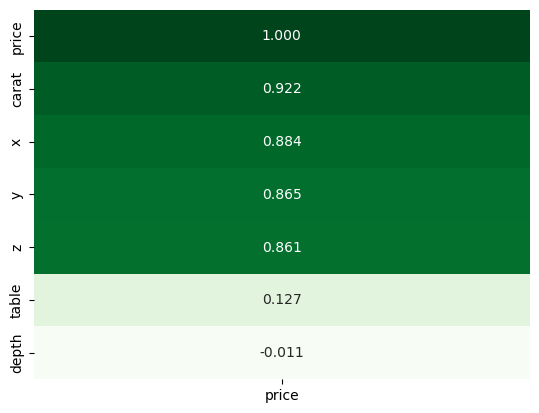

In [8]:
sns.heatmap(data=numeric.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split the dataset
2. Create a model from the training dataset
3. Validate model with test dataset
4. If the model is valid, predict data with it

In [10]:
x = data[['carat']]  
y = data['price'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [11]:
model = LinearRegression()
print(model)

LinearRegression()


In [12]:
model.fit(x_train, y_train)

LinearRegression()

In [13]:
scored = model.score(x_test, y_test)
print(scored)

0.8504107786474794


In [14]:
predicted_y = model.predict(x_test)
print("array:")
print(predicted_y)

array:
[9540.64191438 1940.07543252 3180.98424589 ... 9618.19871522 -464.18539337
 5507.68827094]


In [15]:
predicted_df = pd.DataFrame(data=predicted_y, columns=['Predicted_Price'])
print(predicted_df.head(3))

   Predicted_Price
0      9540.641914
1      1940.075433
2      3180.984246


In [16]:
y_test_df = pd.DataFrame(data=y_test.reset_index(drop=True), columns=['price'])
x_test_df = pd.DataFrame(data=x_test.reset_index(drop=True), columns=['carat'])  
joined_df = pd.concat([x_test_df, y_test_df, predicted_df], axis=1)
print(joined_df.head(5))

   carat  price  Predicted_Price
0   1.52   8674      9540.641914
1   0.54   1637      1940.075433
2   0.70   2657      3180.984246
3   0.59   1838      2327.859437
4   0.86   2980      4421.893059


In [17]:
melted_df = pd.melt(joined_df, id_vars=['carat'], value_vars=['price', 'Predicted_Price'], var_name='price_type', value_name='price_value')
print(melted_df)

       carat       price_type  price_value
0       1.52            price  8674.000000
1       0.54            price  1637.000000
2       0.70            price  2657.000000
3       0.59            price  1838.000000
4       0.86            price  2980.000000
...      ...              ...          ...
32359   0.31  Predicted_Price   156.269013
32360   1.01  Predicted_Price  5585.245072
32361   1.53  Predicted_Price  9618.198715
32362   0.23  Predicted_Price  -464.185393
32363   1.00  Predicted_Price  5507.688271

[32364 rows x 3 columns]


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carat', ylabel='price_value'>

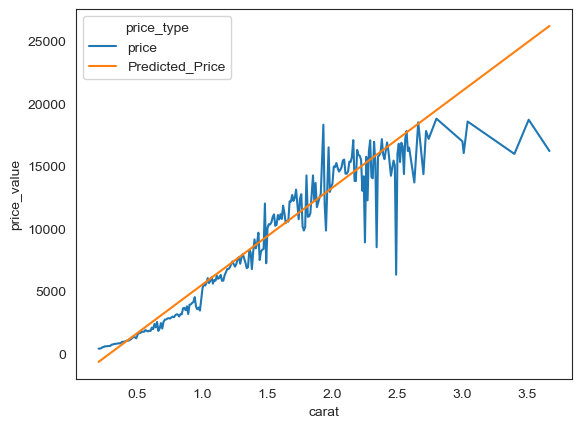

In [18]:
sns.set_style("white")
sns.lineplot(data=melted_df, x='carat', y='price_value', hue='price_type', errorbar=None)

## Regression line equation is y=mx+b, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [20]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [21]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [22]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.360580045403


In [23]:
print(f"Regression line equation is y = {m}x + {b}")

Regression line equation is y = [7756.42561797]x + -2256.360580045403


In [24]:
carat_value = 0.70
predicted_price = m[0] * carat_value + b
print(f"The predicted price for a {carat_value:.2f} carat diamond is ${predicted_price:.2f}")

The predicted price for a 0.70 carat diamond is $3173.14


In [25]:
carat_value = 0.54
predicted_price = m[0] * carat_value + b
print(f"The predicted price for a {carat_value:.2f} carat diamond is ${predicted_price:.2f}")

The predicted price for a 0.54 carat diamond is $1932.11


## The estimates were very close to the predicted prices back from step 18